In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def conv_visualization(raw_image, img_filter, name):
    img = raw_image[np.newaxis, :, :, np.newaxis]
    img = tf.constant(img, dtype=tf.float32, name=f'{name}_raw_img')
    
    img_filter = img_filter[:, :, np.newaxis, np.newaxis]
    img_filter = tf.constant(img_filter, dtype=tf.float32, name=f'{name}_filter')
    # 卷积及最大池化
    feature_map = tf.nn.conv2d(img, img_filter,
                                    strides=[1, 1, 1, 1],
                                    padding="SAME")
    max_pooling = tf.nn.max_pool(feature_map,
                                 ksize=[1, 2, 2, 1],
                                 strides=[1, 2, 2, 1],
                                 padding="SAME")
    # 会话中执行
    with tf.Session():
        filter_val = feature_map.eval()
        maxpool_val = max_pooling.eval()
    # 结果可视化
    fig = plt.figure(figsize=(18, 6))
    
    # 原始图片
    ax0 = fig.add_subplot(1, 3, 1)
    ax0.imshow(raw_image).set_cmap("gray")
    ax0.set_title("raw image")
    ax0.get_xaxis().set_ticks([])
    ax0.get_yaxis().set_ticks([])
    
    # 平均均值卷积
    ax1 = fig.add_subplot(1, 3, 2)
    ax1.imshow(filter_val[0, :, :, 0]).set_cmap("gray")
    ax1.set_title(f"raw image -> {name} conv")
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    # 最大池化操作
    ax2 = fig.add_subplot(1, 3, 3)
    ax2.imshow(maxpool_val[0, :, :, 0]).set_cmap("gray")
    ax2.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    ax2.set_title(f"raw image -> {name} conv -> max pooling")
    
    fig.savefig(f"{name}_example.jpg", bbox_inches="tight")
    return fig

In [3]:
filename = './testdata/dog.jpg'
gray_img = skimage.color.rgb2gray(skimage.io.imread(filename))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


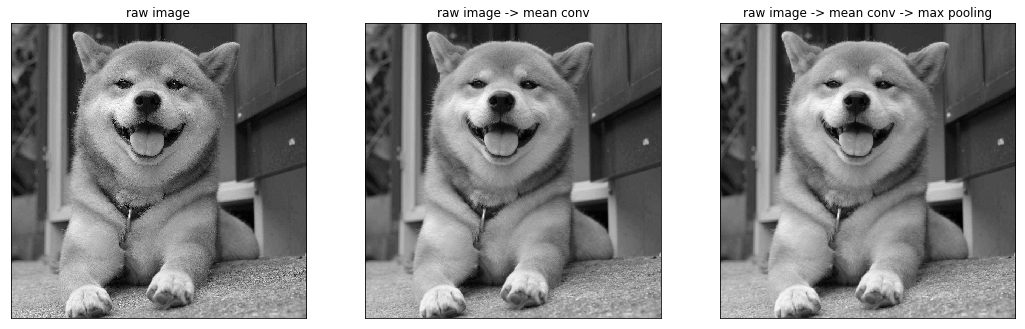

In [4]:
# 均值卷积核
mean_filter = np.ones((3, 3)) / 9
print(mean_filter)
mean_fig = conv_visualization(gray_img, mean_filter, 'mean')

[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


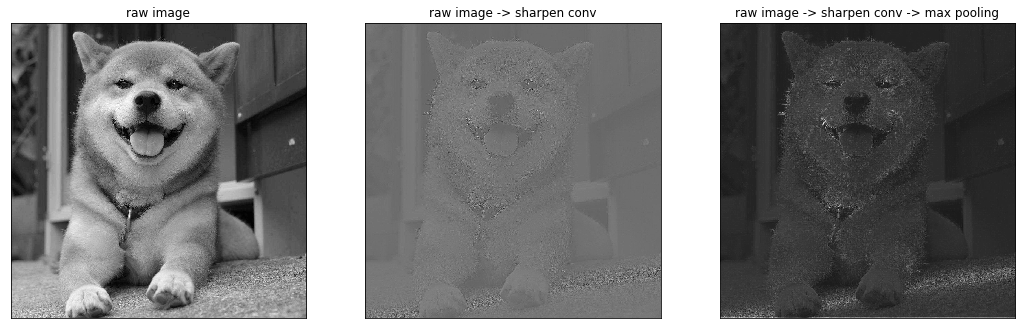

In [5]:
# 锐化卷积核
sharpen_filter = np.ones((3, 3)) * -1
sharpen_filter[1, 1] = 9
print(sharpen_filter)
sharpen_fig = conv_visualization(gray_img, sharpen_filter, 'sharpen')

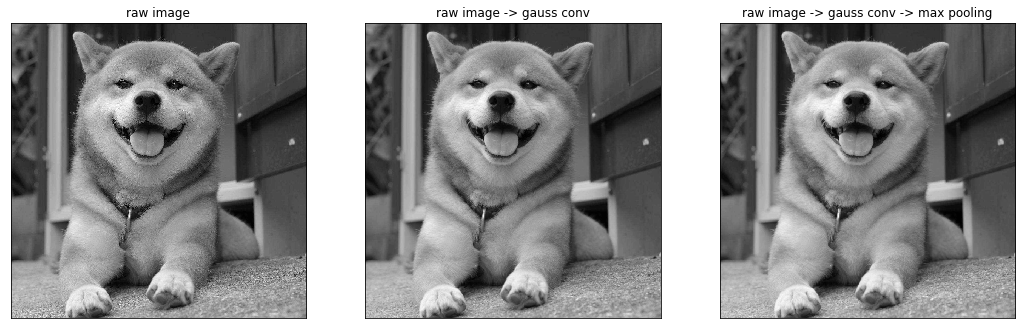

In [6]:
# 高斯平滑
gauss_filter = np.array([[1 / 16, 2 / 16, 1 / 16],
                         [2 / 16, 4 / 16, 2 / 16],
                         [1 / 16, 2 / 16, 1 / 16]])
gauss_fig = conv_visualization(gray_img, gauss_filter, 'gauss')

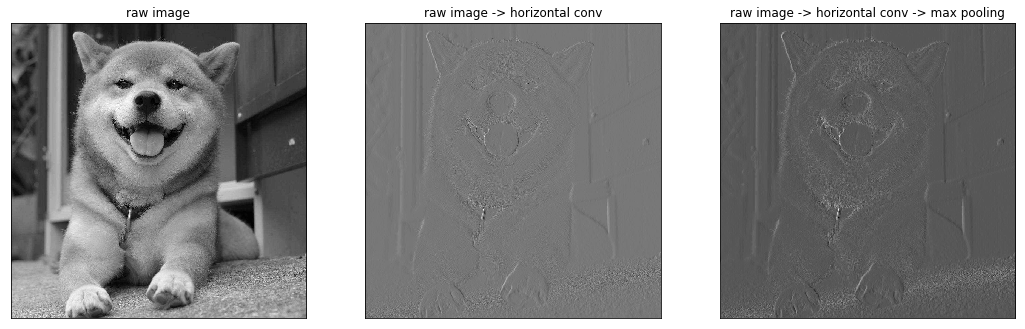

In [7]:
# 水平梯度
horizontal_filter = np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]])
horizontal_fig = conv_visualization(gray_img, horizontal_filter, 'horizontal')    

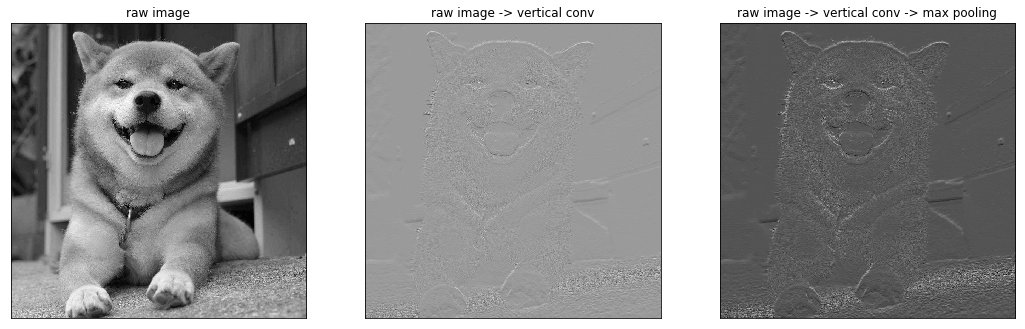

In [8]:
# 垂直梯度
vertical_filter = np.array([[-1, -1, -1],
                            [0, 0, 0],
                            [1, 1, 1]])
vertical_fig = conv_visualization(gray_img, vertical_filter, 'vertical')

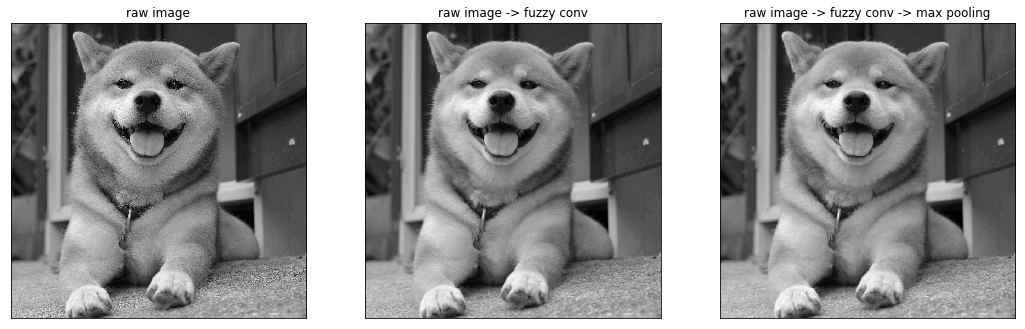

In [9]:
# 模糊
fuzzy_filter = np.array([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
fuzzy_fig = conv_visualization(gray_img, fuzzy_filter, 'fuzzy')

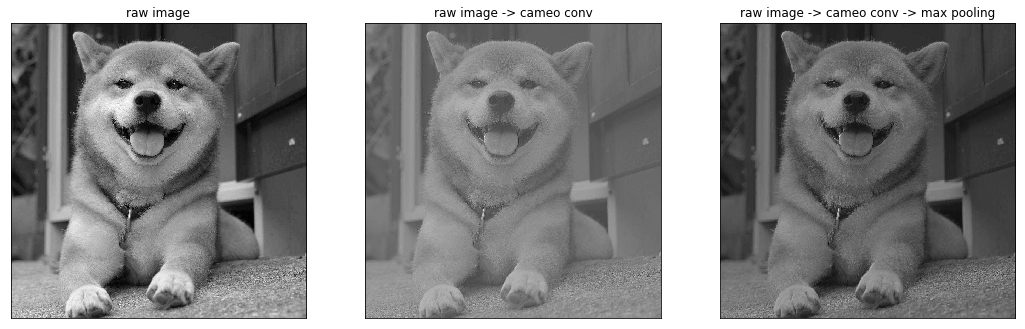

In [10]:
# 浮雕
cameo_filter = np.array([[-2, 1, 0],
                         [-1, 1, 1],
                         [0, 1, 2]])
cameo_fig = conv_visualization(gray_img, cameo_filter, 'cameo')